<h1>PART0: IMPORT ALL LIBRALIES</h1>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import joblib
import os
import time
import random
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

plt.style.use("default")
sns.set_context("notebook")


<h1>PART 1:DATA LOADING<h1>

In [14]:
data = pd.read_csv("../heart_disease_dataset_CHUD_S_A.CSV") 
print("Dataset loaded successfully")

# Verify loading and basic properties
print("Dataset loaded successfully")
print("Total number of samples:", len(data))
print("Total number of features:", data.shape[1])
print("Total missing values in dataset:", data.isnull().sum().sum())
data.head()



Dataset loaded successfully
Dataset loaded successfully
Total number of samples: 5000
Total number of features: 14
Total missing values in dataset: 7660


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,38.871687,Male,Typical Angina,100.490248,163.166661,NaN,LV hypertrophy,183.658119,No,0.114644,Upsloping,0.0,Normal,no disease
1,60.625755,Male,Asymptomatic,NaN,338.711395,True,LV hypertrophy,141.161921,NaN,2.361526,Downsloping,2.0,NaN,severe
2,64.306898,Male,NaN,146.355656,337.004035,True,LV hypertrophy,NaN,Yes,2.660477,Downsloping,2.0,Reversible defect,severe
3,57.457313,Female,Non-Anginal Pain,NaN,260.116075,True,NaN,150.353969,Yes,1.145959,Flat,1.0,Reversible defect,mild
4,53.394739,Male,Non-Anginal Pain,129.763455,224.948879,False,LV hypertrophy,147.834030,Yes,NaN,Flat,NaN,Reversible defect,mild


<h1>PART 2 EDA(Exploratory Data Analysis)</h1>

In [15]:

# Detailed Exploratory Data Analysis (EDA)


print("DATASET DETAILED INFORMATION\n")

# shape for only instances (samples)
num_instances = data.shape[0]
print("Total number of instances (samples):", num_instances)

# shape for only features
num_features = data.shape[1] - 1  # excluding target
print("Total number of input features:", num_features)

# Feature names and data types
print("\nFEATURE NAMES AND DATA TYPES\n")
feature_info = pd.DataFrame({
    "Feature": data.columns,
    "Data Type": data.dtypes.astype(str)
})
print(feature_info)

# Dataset info summary
print("\nDATASET STRUCTURE OVERVIEW\n")
data.info()

# Descriptive statistics for numerical features
print("\nDESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES\n")
print(data.describe().T)


# Heart Disease Class Distribution Analysis

class_counts = data["heart_disease"].value_counts().sort_index()
class_percentages = (class_counts / data.shape[0]) * 100

class_distribution = pd.DataFrame({
    "Number of Samples": class_counts,
    "Percentage (%)": class_percentages.round(2)
})

print("\nHEART DISEASE CLASS DISTRIBUTION\n")
print(class_distribution)

# Dataset Balance Analysis
largest_class = class_counts.max()
smallest_class = class_counts.min()
imbalance_ratio = largest_class / smallest_class

print("\nDATASET BALANCE ANALYSIS\n")
print("Largest class sample count:", largest_class)
print("Smallest class sample count:", smallest_class)
print("Imbalance ratio (largest / smallest):", round(imbalance_ratio, 2))

if imbalance_ratio <= 1.5:
    print("\nInterpretation:")
    print("The dataset is well balanced, as the class distribution is relatively uniform.")
elif imbalance_ratio <= 3:
    print("\nInterpretation:")
    print("The dataset shows moderate class imbalance, which may require stratified sampling.")
else:
    print("\nInterpretation:")
    print("The dataset is highly imbalanced and may require resampling techniques.")

# Dataset Balance Analysis

largest_class = class_counts.max()
smallest_class = class_counts.min()
imbalance_ratio = largest_class / smallest_class

print("\nDATASET BALANCE ANALYSIS\n")
print("Largest class sample count:", largest_class)
print("Smallest class sample count:", smallest_class)
print("Imbalance ratio (largest / smallest):", round(imbalance_ratio, 2))

if imbalance_ratio <= 1.5:
    print("\nInterpretation:")
    print("The dataset is well balanced, as the class distribution is relatively uniform.")
elif imbalance_ratio <= 3:
    print("\nInterpretation:")
    print("The dataset shows moderate class imbalance, which may require stratified sampling.")
else:
    print("\nInterpretation:")
    print("The dataset is highly imbalanced and may require resampling techniques.")


DATASET DETAILED INFORMATION

Total number of instances (samples): 5000
Total number of input features: 13

FEATURE NAMES AND DATA TYPES

                     Feature Data Type
age                      age   float64
sex                      sex    object
cp                        cp    object
trestbps            trestbps   float64
chol                    chol   float64
fbs                      fbs    object
restecg              restecg    object
thalach              thalach   float64
exang                  exang    object
oldpeak              oldpeak   float64
slope                  slope    object
ca                        ca   float64
thal                    thal    object
heart_disease  heart_disease    object

DATASET STRUCTURE OVERVIEW

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex 

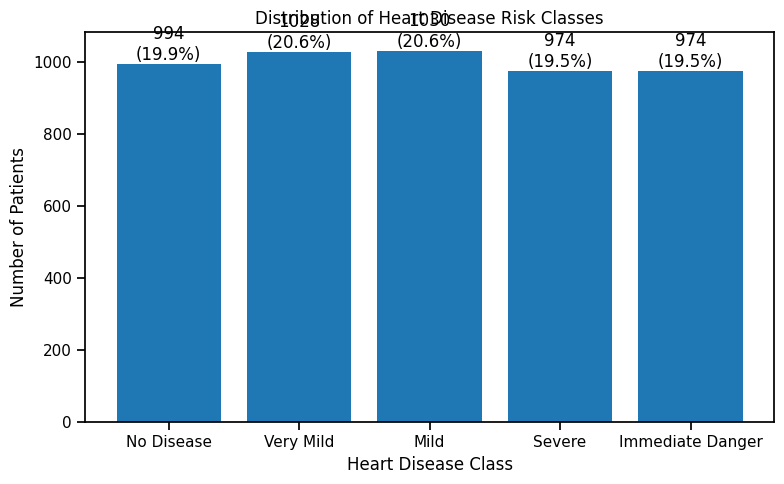

In [16]:
# Class distribution with counts and percentages
class_counts = data["heart_disease"].value_counts().sort_index()
class_percentages = class_counts / len(data) * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(class_counts.index, class_counts.values)

plt.xlabel("Heart Disease Class")
plt.ylabel("Number of Patients")
plt.title("Distribution of Heart Disease Risk Classes")

# Add labels on bars
for bar, count, perc in zip(bars, class_counts.values, class_percentages.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{count}\n({perc:.1f}%)",
        ha="center",
        va="bottom"
    )

plt.xticks(
    ticks=class_counts.index,
    labels=["No Disease", "Very Mild", "Mild", "Severe", "Immediate Danger"]
)

plt.tight_layout()
plt.show()


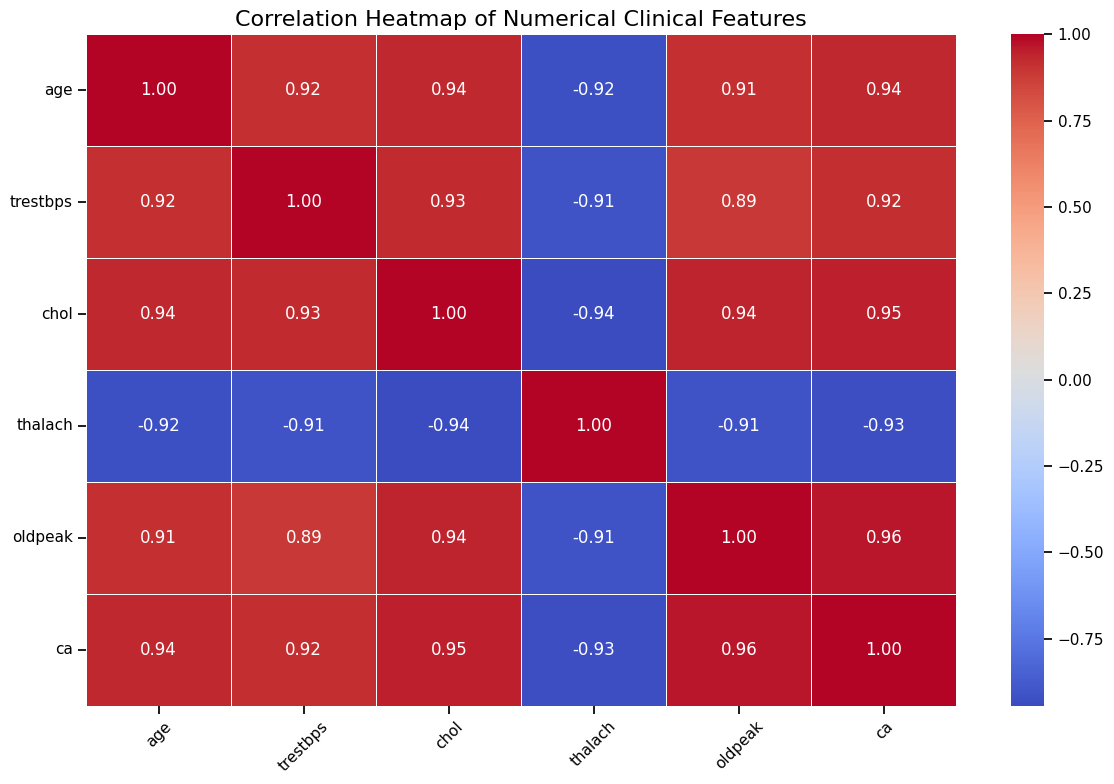

In [17]:
# Select numerical features
numerical_data = data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12, 8))

sns.heatmap(
    numerical_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap of Numerical Clinical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


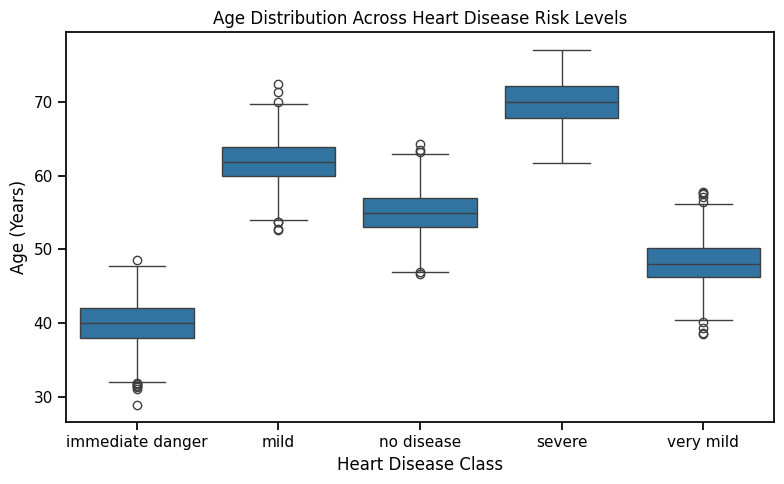

In [18]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x="heart_disease",
    y="age",
    data=data
)

plt.xlabel("Heart Disease Class")
plt.ylabel("Age (Years)")
plt.title("Age Distribution Across Heart Disease Risk Levels")

# Automatically get unique classes to match your dataset
unique_classes = sorted(data["heart_disease"].unique())
plt.xticks(
    ticks=range(len(unique_classes)),
    labels=unique_classes
)

plt.tight_layout()
plt.show()


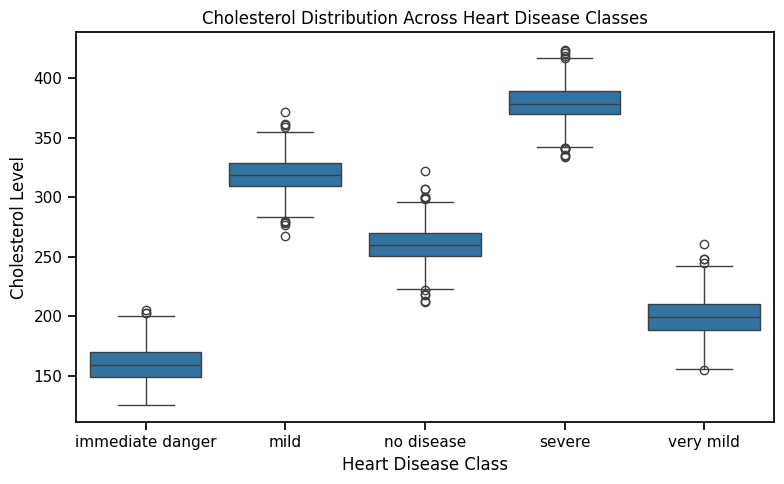

In [19]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x="heart_disease",   # correct column name
    y="chol",            # correct column name
    data=data
)

plt.xlabel("Heart Disease Class")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Distribution Across Heart Disease Classes")

# Automatically set x-ticks based on unique classes in the dataset
unique_classes = sorted(data["heart_disease"].unique())
plt.xticks(
    ticks=range(len(unique_classes)),
    labels=unique_classes
)

plt.tight_layout()
plt.show()


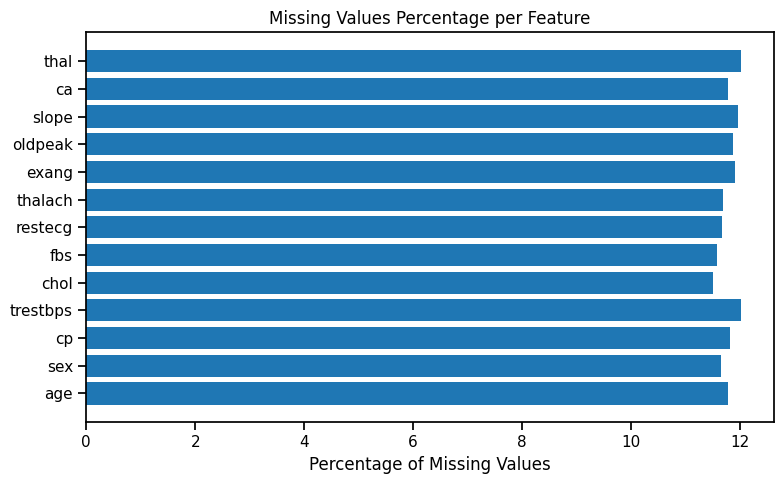

In [20]:
missing_counts = data.isnull().sum()
missing_percent = (missing_counts / len(data)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage": missing_percent
})

missing_df = missing_df[missing_df["Missing Count"] > 0]

if missing_df.empty:
    print("No missing values were found in the dataset.")
else:
    plt.figure(figsize=(8,5))
    plt.barh(
        missing_df.index,
        missing_df["Missing Percentage"]
    )
    plt.xlabel("Percentage of Missing Values")
    plt.title("Missing Values Percentage per Feature")
    plt.tight_layout()
    plt.show()


<h1>PART 3: DATA PREPROCESSING</h1>

In [21]:
# PART 3: Train-Test Split and Preprocessing

# 1. Split dataset into predictors (X) and target (y)
X = data.drop(columns=["heart_disease"])  
y = data["heart_disease"]  

# 2. Perform 80/20 train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          
    random_state=42,        
    stratify=y              
)

# 3. Display number of samples in training and testing sets
total_samples = len(data)
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])

# Display percentage of dataset represented by train/test sets
print("Training set percentage: {:.2f}%".format(100 * X_train.shape[0] / total_samples))
print("Testing set percentage: {:.2f}%".format(100 * X_test.shape[0] / total_samples))

# 4. Verify stratification by calculating class distribution
def class_distribution_percent(y_series):
    """Calculate class distribution in percentage"""
    return (y_series.value_counts(normalize=True) * 100).round(2)

# Compute class distributions
original_dist = class_distribution_percent(y)
train_dist = class_distribution_percent(y_train)
test_dist = class_distribution_percent(y_test)

# Display class distributions in a DataFrame
class_distribution_df = pd.DataFrame({
    "Original (%)": original_dist,
    "Train (%)": train_dist,
    "Test (%)": test_dist
}).sort_index()

print("\nClass distribution (%)")
print(class_distribution_df)

# 5. Identify numerical and categorical features
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist() 
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()         

# Display numerical features and count
print("\nNumerical features:", numerical_features)
print("Count of numerical features:", len(numerical_features))

# Display categorical features and count
print("\nCategorical features:", categorical_features)
print("Count of categorical features:", len(categorical_features))

# 6. Define preprocessing pipeline for numerical features
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Fill missing numeric values with mean
    ("scaler", StandardScaler())                  # Standardize features to zero mean and unit variance
])

# 7. Define preprocessing pipeline for categorical features
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values with mode
    ("encoder", OneHotEncoder(handle_unknown="ignore"))    # One-hot encode, ignore unseen categories
])

# 8. Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),      
    ("cat", categorical_pipeline, categorical_features)    
])

# 9. Fit preprocessor on training data and transform both training and testing sets
X_train_transformed = preprocessor.fit_transform(X_train)  # Fit + transform on training set
X_test_transformed = preprocessor.transform(X_test)        # Transform testing set using training fit

# 10. Display shapes of transformed datasets
print("\nTransformed training set shape:", X_train_transformed.shape)
print("Transformed testing set shape:", X_test_transformed.shape)

# 11. Check for missing values after preprocessing
print("Missing values in training set:", np.isnan(X_train_transformed).sum())
print("Missing values in testing set:", np.isnan(X_test_transformed).sum())

# 12. Verify all transformed features are numeric
print("All transformed features numeric:", np.issubdtype(X_train_transformed.dtype, np.number))

# 13. Optional: Get transformed feature names (useful for analysis)
cat_features = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
all_features = numerical_features + cat_features.tolist()
print("\nTotal number of transformed features:", len(all_features))
print("Sample transformed feature names:", all_features[:10])


Number of training samples: 4000
Number of testing samples: 1000
Training set percentage: 80.00%
Testing set percentage: 20.00%

Class distribution (%)
                  Original (%)  Train (%)  Test (%)
heart_disease                                      
immediate danger         19.88      19.88      19.9
mild                     20.56      20.58      20.5
no disease               20.60      20.60      20.6
severe                   19.48      19.48      19.5
very mild                19.48      19.48      19.5

Numerical features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Count of numerical features: 6

Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Count of categorical features: 7

Transformed training set shape: (4000, 25)
Transformed testing set shape: (1000, 25)
Missing values in training set: 0
Missing values in testing set: 0
All transformed features numeric: True

Total number of transformed features: 25
Sample transformed feature n

<h1>PART 4: MODEL TRAINING & EVALUATION<h/1>


Training Model: MLP/ANN
Best Parameters: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,)}
CV Accuracy: 0.9983
Training Accuracy: 0.9998
Testing Accuracy: 0.9950
Training Time: 171.71 seconds

Training Model: RandomForest
Best Parameters: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
CV Accuracy: 0.9998
Training Accuracy: 1.0000
Testing Accuracy: 0.9990
Training Time: 21.41 seconds

Training Model: SVM
Best Parameters: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
CV Accuracy: 0.9988
Training Accuracy: 0.9990
Testing Accuracy: 0.9970
Training Time: 3.83 seconds

Training Model: KNN
Best Parameters: {'clf__metric': 'manhattan', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
CV Accuracy: 0.9957
Training Accuracy: 1.0000
Testing Accuracy: 0.9950
Training Time: 2.25 seconds

Training Model: GradientBoosting
Best Parameters: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 200}
CV Ac

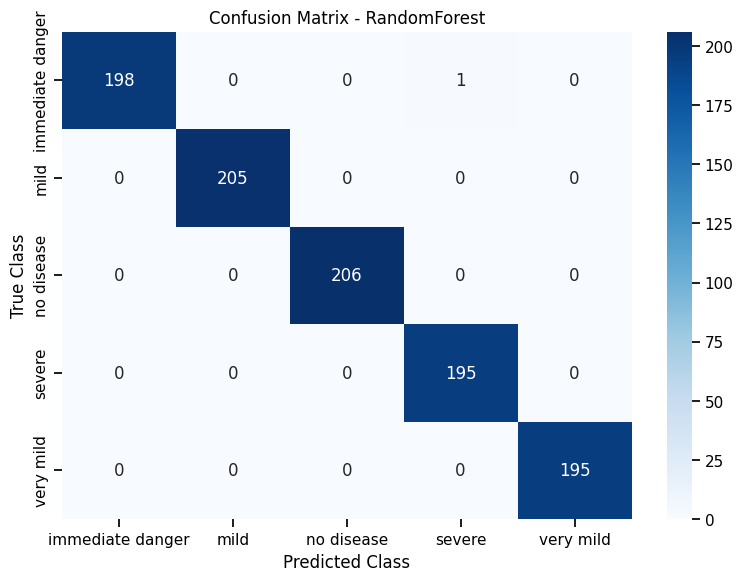


PER-CLASS PERFORMANCE ANALYSIS
Class with Highest Precision: immediate danger
Class with Lowest Recall: immediate danger

Clinical Interpretation:
High precision class indicates strong confidence when predicting this disease category.
Low recall class indicates potential missed heart disease patients.

TOP IMPORTANT FEATURES

                   Feature  Importance
4                  oldpeak    0.168324
5                       ca    0.123704
10     cp_Non-Anginal Pain    0.094505
2                     chol    0.072762
23             thal_Normal    0.068098
22       thal_Fixed defect    0.060841
11       cp_Typical Angina    0.060614
9       cp_Atypical Angina    0.053055
24  thal_Reversible defect    0.041671
19       slope_Downsloping    0.034473


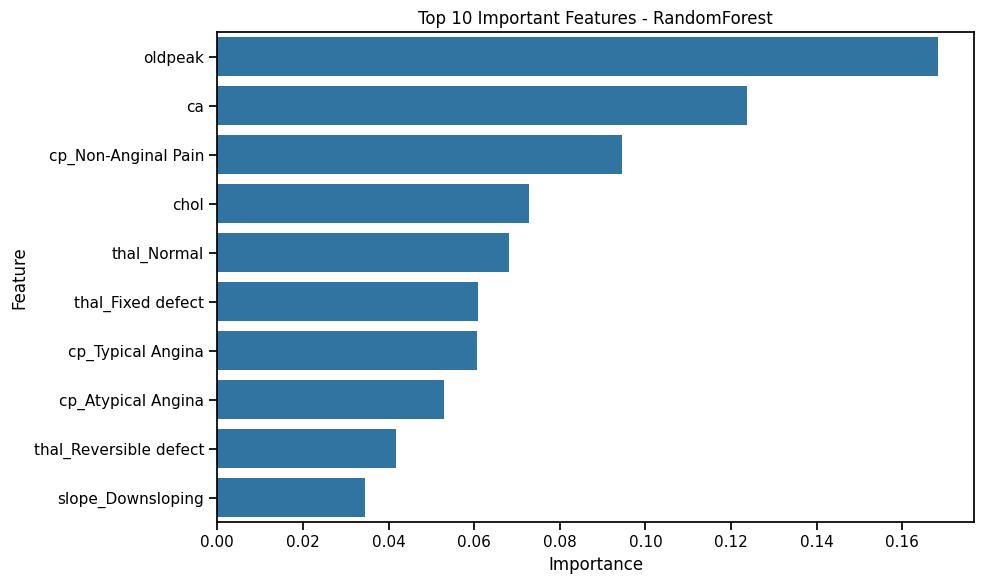

In [24]:
# PART 4: TRAIN MULTIPLE MODELS WITH HYPERPARAMETER TUNING


# (A) DEFINE MODELS TO TRAIN

models = {
    "MLP/ANN": MLPClassifier(max_iter=1000, solver="adam", random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}


# (B) DEFINE HYPERPARAMETER GRIDS FOR GRIDSEARCHCV

param_grids = {

    "MLP/ANN": {
        "clf__hidden_layer_sizes": [(50,), (100,)],
        "clf__activation": ["relu", "tanh"],
        "clf__alpha": [0.0001, 0.001]
    },

    "RandomForest": {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 5]
    },

    "SVM": {
        "clf__C": [0.1, 1],
        "clf__kernel": ["linear", "rbf"],
        "clf__gamma": ["scale"]
    },

    "KNN": {
        "clf__n_neighbors": [3, 5],
        "clf__weights": ["uniform", "distance"],
        "clf__metric": ["euclidean", "manhattan"]
    },

    "GradientBoosting": {
        "clf__n_estimators": [100, 200],
        "clf__learning_rate": [0.05, 0.1],
        "clf__max_depth": [3, 5]
    }
}


# (C) TRAIN, TUNE AND EVALUATE EACH MODEL

results = []

for name, model in models.items():

    print(f"\nTraining Model: {name}")

    # (a) Build full pipeline (Preprocessing + Classifier)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)
    ])

    # (b) Apply GridSearchCV

    grid = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    # (c) Record training time

    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time

    # (d) Evaluate best model

    train_accuracy = grid.score(X_train, y_train)
    test_accuracy = grid.score(X_test, y_test)
    cv_accuracy = grid.best_score_

    overfit_gap = train_accuracy - test_accuracy

    print("Best Parameters:", grid.best_params_)
    print(f"CV Accuracy: {cv_accuracy:.4f}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

    # (e) Store results for comparison

    results.append({
        "Model": name,
        "Best CV accuracy": cv_accuracy,
        "Train accuracy": train_accuracy,
        "Test accuracy": test_accuracy,
        "Overfitting Gap": overfit_gap,
        "Training time": training_time,
        "Estimator": grid.best_estimator_
    })


# MODEL COMPARISON & SELECTION

comparison_df = pd.DataFrame(results)


# (a) Define rule for Overfit / Underfit / Best Fit

def classify_model(gap):
    if gap > 0.05:
        return "Overfit"
    elif gap < -0.05:
        return "Underfit"
    else:
        return "Best fit"


comparison_df["Status"] = comparison_df["Overfitting Gap"].apply(classify_model)


# (b) Sort models by descending Test Accuracy

comparison_df = comparison_df.sort_values(by="Test accuracy", ascending=False)


# (c) Display Final Comparison Table

final_columns = [
    "Model",
    "Best CV accuracy",
    "Train accuracy",
    "Test accuracy",
    "Overfitting Gap",
    "Status"
]

print("\nMODEL COMPARISON TABLE\n")
print(comparison_df[final_columns])


# (d) Select Best Model

best_row = comparison_df.iloc[0]

best_model_name = best_row["Model"]
best_model = best_row["Estimator"]
best_test_accuracy = best_row["Test accuracy"]

print("\nBEST MODEL SELECTED")
print(f"Model Name: {best_model_name}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")


# DETAILED EVALUATION OF BEST MODEL


# (a) Classification Report

y_pred = best_model.predict(X_test)

print("\nCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))


# (b) Confusion Matrix Visualization + Save Image

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=sorted(y_test.unique()),
    yticklabels=sorted(y_test.unique())
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix - {best_model_name}")

plt.tight_layout()
plt.savefig(f"{best_model_name}_confusion_matrix.png")
plt.show()


# (c) Per-Class Precision & Recall Analysis

report_dict = classification_report(y_test, y_pred, output_dict=True)

precision_scores = {}
recall_scores = {}

for label, values in report_dict.items():
    if label not in ["accuracy", "macro avg", "weighted avg"]:
        precision_scores[label] = values["precision"]
        recall_scores[label] = values["recall"]

highest_precision_class = max(precision_scores, key=precision_scores.get)
lowest_recall_class = min(recall_scores, key=recall_scores.get)

print("\nPER-CLASS PERFORMANCE ANALYSIS")
print("Class with Highest Precision:", highest_precision_class)
print("Class with Lowest Recall:", lowest_recall_class)

print("\nClinical Interpretation:")
print("High precision class indicates strong confidence when predicting this disease category.")
print("Low recall class indicates potential missed heart disease patients.")


# (d) Feature Importance Analysis

if hasattr(best_model.named_steps["clf"], "feature_importances_"):

    importances = best_model.named_steps["clf"].feature_importances_

    categorical_names = best_model.named_steps["preprocessor"] \
        .named_transformers_["cat"]["encoder"] \
        .get_feature_names_out(categorical_features)

    feature_names = numerical_features + list(categorical_names)

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("\nTOP IMPORTANT FEATURES\n")
    print(importance_df.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=importance_df.head(10),
        x="Importance",
        y="Feature"
    )

    plt.title(f"Top 10 Important Features - {best_model_name}")
    plt.tight_layout()
    plt.show()

else:
    print("\nSelected model does NOT support feature importance.")


<h1>PART 5 MODEL PERSISTENCE</H1>

In [23]:
# PART 5: Model Persistence and Verification

# Create deployment directory if it doesn't exist
deployment_dir = "deployment"
os.makedirs(deployment_dir, exist_ok=True)

# Save the best performing model (pipeline + classifier) using joblib
model_path = os.path.join(deployment_dir, "best_model.pkl")
joblib.dump(best_model_estimator, model_path)
print(f"Model saved at: {model_path}")

# Save feature column names into a text file for future inference
feature_path = os.path.join(deployment_dir, "feature_columns.txt")
with open(feature_path, "w") as f:
    for col in X_test.columns:
        f.write(col + "\n")
print(f"Feature columns saved at: {feature_path}")

# Save class names into a text file (consistent order)
class_path = os.path.join(deployment_dir, "class_names.txt")
with open(class_path, "w") as f:
    for cls in sorted(y_test.unique()):
        f.write(str(cls) + "\n")
print(f"Class names saved at: {class_path}")

# Verification 1: Reload the saved model and predict on random test samples
loaded_model = joblib.load(model_path)

# Select 5 random test samples
sample_indices = random.sample(range(len(X_test)), 5)
X_sample = X_test.iloc[sample_indices]
y_sample = y_test.iloc[sample_indices]

# Make predictions
y_pred_sample = loaded_model.predict(X_sample)

# Display results in a structured DataFrame
verification_df = pd.DataFrame({
    "Actual": y_sample.values,
    "Predicted": y_pred_sample
})
print("\nRandom Test Samples Prediction")
print(verification_df)

# Verification 2: Predict on new custom patient samples
new_patients = pd.DataFrame({
    "age": [55, 60],
    "sex": ["M", "F"],
    "cp": ["typical angina", "asymptomatic"],
    "trestbps": [140, 130],
    "chol": [250, 300],
    "fbs": ["<120", ">120"],
    "restecg": ["normal", "ST-T abnormality"],
    "thalach": [150, 160],
    "exang": ["no", "yes"],
    "oldpeak": [1.5, 2.0],
    "slope": ["upsloping", "flat"],
    "ca": [0, 1],
    "thal": ["normal", "fixed defect"]
})

# Generate predicted classes and probabilities for each class
pred_classes = loaded_model.predict(new_patients)
pred_probs = loaded_model.predict_proba(new_patients)

# Combine predictions with original patient data
new_verification_df = new_patients.copy()
new_verification_df["Predicted Class"] = pred_classes

# Add probability for each class
class_names = sorted(y_test.unique())
for i, cls in enumerate(class_names):
    new_verification_df[f"Prob_{cls}"] = pred_probs[:, i]

# Display results in a structured DataFrame
print("\nNew Patient Predictions")
print(new_verification_df)


Model saved at: deployment\best_model.pkl
Feature columns saved at: deployment\feature_columns.txt
Class names saved at: deployment\class_names.txt

Random Test Samples Prediction
             Actual         Predicted
0            severe            severe
1  immediate danger  immediate danger
2            severe            severe
3            severe            severe
4         very mild         very mild

New Patient Predictions
   age sex              cp  trestbps  chol   fbs           restecg  thalach  \
0   55   M  typical angina       140   250  <120            normal      150   
1   60   F    asymptomatic       130   300  >120  ST-T abnormality      160   

  exang  oldpeak      slope  ca          thal Predicted Class  \
0    no      1.5  upsloping   0        normal      no disease   
1   yes      2.0       flat   1  fixed defect       very mild   

   Prob_immediate danger  Prob_mild  Prob_no disease  Prob_severe  \
0                   0.02      0.135            0.450        0.08